## INTRODUCTION

With over 220 million paying customers, Netflix is one of the most popular OTT services in the world. It is a streaming service that provides a plethora of TV series, movies, animes, documentaries, and other content. With the rising availability of low-cost smartphones and high-quality internet connectivity, OTT platforms have grown significantly year after year by eliminating adverts from their process workflow! Because of the COVID - 19 lockdowns, competition among streaming providers has been severe! These platforms are racing to immerse as many users as possible in their services by offering a variety of deals, employing ML recommender systems for content recommendation, and so on in order to maximize client lifetime value!
Thus, knowing the process workflow via data lenses becomes critical in order to generate income! Client churn analysis, customer acquisition cost, throughput, and other factors must be constantly scrutinized in order to improve existing systems for greater revenue and profitability! This dataset allows you to produce a report utilizing visualization techniques based on the insights gathered from the tabular data, which includes both text and numerical data!



##ABSTRACT

Netflix is an application that is rapidly expanding in terms of popularity, programs, and content. This is an EDA or narrative telling using data, with a content-based recommendation engine and a variety of graphs and graphics.

##Model Interpretability

Models are interpretable when people can easily comprehend the logic behind the model's predictions and conclusions.

The more interpretable the models, the easier it is to understand and trust the model.

Deep learning and gradient boosting models, for example, are not interpretable and are referred to as black-box models because they are too sophisticated for human comprehension. A person cannot comprehend the complete model at once and understand the reasons behind each decision.

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.8 MB/s 
     |████████████████████████████████| 167 kB 50.5 MB/s 
     |████████████████████████████████| 1.7 MB 27.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 45.0 MB/s 
     |████████████████████████████████| 2.0 MB 50.6 MB/s 
     |████████████████████████████████| 16.5 MB 46.6 MB/s 
     |████████████████████████████████| 325 kB 55.2 MB/s 
     |████████████████████████████████| 141 kB 59.5 MB/s 
     |████████████████████████████████| 5.0 MB 22.0 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 6.8 MB 34.4 MB/s 
     |████████████████████████████████| 

In [2]:
!pip install shap
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.4 MB 3.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Packages
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving tv_shows.csv to tv_shows.csv


In [5]:
#Reading the Netflix TV shows dataset.
shows=pd.read_csv("/content/tv_shows.csv")

In [6]:
#Viewing data in the file.
shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [7]:
#checking if the any data is missing
shows.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

Yes, there are data missing from Age and IMDb columns, which means imputation of null values are from the data.

In [8]:
#Dropping IMDb data as it is the target variable which we will predict. 
shows.dropna(subset=["IMDb"],inplace=True)
shows["IMDb"]= shows["IMDb"].str.extract('(\d+)').astype(float)
shows=shows.reset_index()

In [9]:
#Filling Rotten Tomatoes data with 0
#shows['Rotten Tomatoes'] = shows['Rotten Tomatoes'].fillna("0")
shows["Rotten Tomatoes"]= shows['Rotten Tomatoes'].str.extract('(\d+)').astype(float)

Using Simple Imputer to impute the missing values in age.

In [10]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

shows_imputed=pd.DataFrame(simple_imputer.fit_transform(shows))
shows_imputed.columns=shows.columns
shows_imputed.index=shows.index

In [11]:
#Dropping ID and Title column as it is not required to predict
shows.drop(columns=["Unnamed: 0","ID","Title"],inplace=True)
shows['Age']=shows_imputed['Age'].copy()

In [12]:
#Dropping Type column as it has only 1 as values.
shows.drop(columns=["Type"],inplace=True)

##NUMERICAL VARIABLES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f285257ca60>]],
      dtype=object)

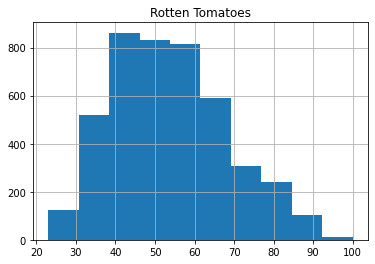

In [13]:
#Checking distribution of the independent variable and Plotting Histogram for the same "Rotten Tomatoes"
shows.hist(column='Rotten Tomatoes')

#IDENTIFYING PREDICTOR SIGNIFICANCE

In [14]:
shows_df=pd.get_dummies(shows)

In [15]:
shows_df.drop(columns=['IMDb','index'],inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() # Normalization
shows_df['Rotten Tomatoes']= mms.fit_transform(shows_df[['Rotten Tomatoes']])
shows_df['Year']= mms.fit_transform(shows_df[['Year']])

In [17]:
Y=shows["IMDb"].values
X=shows_df.copy()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)
# Make predictions using the training set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 1.01
Coefficient of determination: 0.22
R^2 score on test set = 0.2202438559608515


In [20]:
print(regr.intercept_)

5.952205553855852


Even if I had no understanding about the criteria used to calculate the rating, I would still receive the supplied intercept(5.95)

In [21]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(regr.coef_)), columns=['features', 'coef']).sort_values(by=['coef'])

In [22]:
coef.sort_values(by="coef")

,features,coef
0,Year,-0.496384
3,Hulu,-0.311376
2,Netflix,-0.116411
9,Age_7+,-0.110291
8,Age_18+,-0.086794
10,Age_all,-0.056357
5,Disney+,-0.038509
6,Age_13+,0.100797
4,Prime Video,0.101968
7,Age_16+,0.152645


The features that assist forecast the IMDb are Disney+, Prime Video, Netflix, Rotten Tomatoes, and Age groupings.

##Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor #Import Decision Tree Regressor

# Create Decision Tree Regressor object
dt = DecisionTreeRegressor(max_depth=5)

# Train Decision Tree Regressor
dt = dt.fit(X_train,y_train)

#PredICT for test dataset
y_pred = dt.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 1.03
Coefficient of determination: 0.20
R^2 score on tarining set = 0.2028483448554721


##Interpreting The Nodes Of Decision Tree

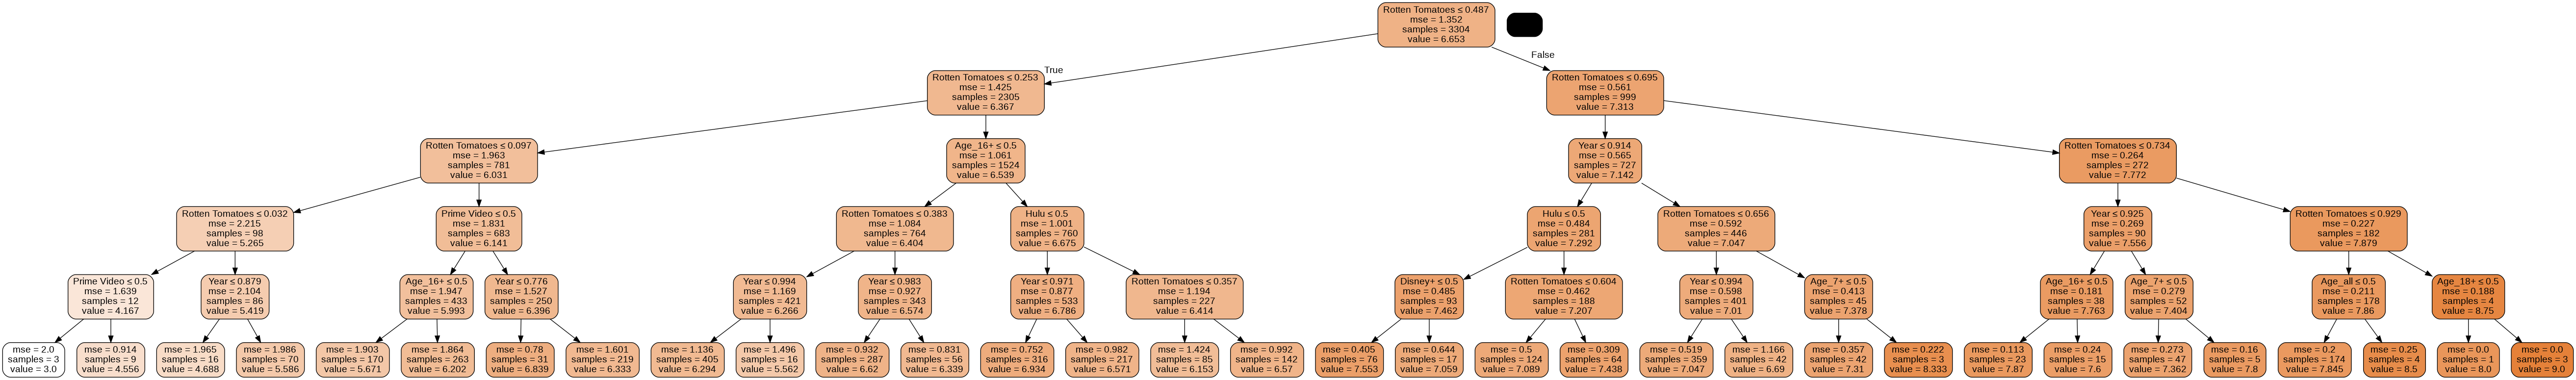

In [24]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##AutoML - PyCaret Library to select and tune the best Model

In [26]:
# importing classification
from pycaret.classification import *

In [27]:
from pycaret.regression import *

In [28]:
shows

,index,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0,2008,18+,9.0,100.0,1,0,0,0
1,1,2016,16+,8.0,96.0,1,0,0,0
2,2,2013,18+,9.0,95.0,1,1,0,0
3,3,2015,18+,8.0,94.0,1,0,0,0
4,4,2017,16+,8.0,93.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
4401,5339,2018,7+,7.0,30.0,0,0,0,1
4402,5340,2018,all,3.0,30.0,0,0,0,1
4403,5341,2020,all,5.0,29.0,0,0,0,1
4404,5342,2018,all,7.0,28.0,0,0,0,1


##Setting Up The Classifier

In [29]:
reg = setup(data = shows, 
            target = 'IMDb',
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=3,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,2430
1,Target,IMDb
2,Original Data,"(4406, 9)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3084, 12)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='IMDb',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dummy', Dummify(target='IMDb')),
                ('fix_perfect', Remove_100(target='IMDb')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough

##Model Comparison & Evaluation

In [30]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7690,1.0484,1.0236,0.2227,0.1572,0.1420,0.2000
huber,Huber Regressor,0.7809,1.0754,1.0365,0.2037,0.1588,0.1440,0.0533
lr,Linear Regression,0.7809,1.0783,1.0378,0.2016,0.1593,0.1446,1.1167
ridge,Ridge Regression,0.7811,1.0790,1.0382,0.2011,0.1594,0.1447,0.0200
br,Bayesian Ridge,0.7812,1.0792,1.0382,0.2010,0.1594,0.1447,0.0300
lar,Least Angle Regression,0.7863,1.0891,1.0430,0.1935,0.1599,0.1453,0.0233
lightgbm,Light Gradient Boosting Machine,0.7884,1.1067,1.0518,0.1782,0.1599,0.1439,0.3167
omp,Orthogonal Matching Pursuit,0.7943,1.1124,1.0540,0.1769,0.1615,0.1472,0.0233
ada,AdaBoost Regressor,0.8060,1.1197,1.0573,0.1718,0.1627,0.1504,0.1000
rf,Random Forest Regressor,0.8120,1.1773,1.0845,0.1264,0.1644,0.1484,0.5700


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

##Creating a Model

In [31]:
lgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7714,1.0515,1.0254,0.2207,0.1548,0.1382
1,0.8015,1.1627,1.0783,0.2085,0.1720,0.1572
2,0.7924,1.1059,1.0516,0.1054,0.1527,0.1364
Mean,0.7884,1.1067,1.0518,0.1782,0.1599,0.1439
Std,0.0126,0.0454,0.0216,0.0517,0.0087,0.0094


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=2...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

### Hyperparameter Tuning

A hyperparameter is a parameter that is used to modify the behavioral pattern of a machine-learning model. Its tuning entails determining a set of ideal hyperparameter variables for a training algorithm and then applying the optimized algorithm to any data collection.

In [32]:
tuned_model = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7559,0.9975,0.9988,0.2607,0.1522,0.1367
1,0.7782,1.1176,1.0572,0.2392,0.1708,0.1555
2,0.7676,1.0103,1.0052,0.1827,0.1463,0.1319
Mean,0.7672,1.0418,1.0204,0.2275,0.1564,0.1413
Std,0.0091,0.0538,0.0261,0.0329,0.0104,0.0102


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=0.7, bagging_freq=5,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=16,
                                min_child_weight=0.001, min_split_gain=0.6,
                                n_estimators=250, n_jobs=-1, num_leaves=6,
                                objective=None,
                                power_transformer_method='b...
                                                        importance_type='split',
                                                        learning_rate=0.15,
                                                        max_depth=-1,
                                

In [33]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.1 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


## Model Interpretability using SHAP

SHAP: It is a mathematical framework for explaining machine learning model predictions. It is based on game theory ideas and may be used to explain any machine learning model's predictions by computing the contribution of each attribute to the prediction.

In [34]:
import shap

In [35]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
sample_ind = 20

## Interpret Linear Regression Model using SHAP

In [36]:
# compute the SHAP values for the linear model
explainer_linear = shap.Explainer(regr.predict, X100)
shap_values_linear = explainer_linear(X)

Permutation explainer: 4407it [07:18, 10.03it/s]


##Interpreting the SHAP values

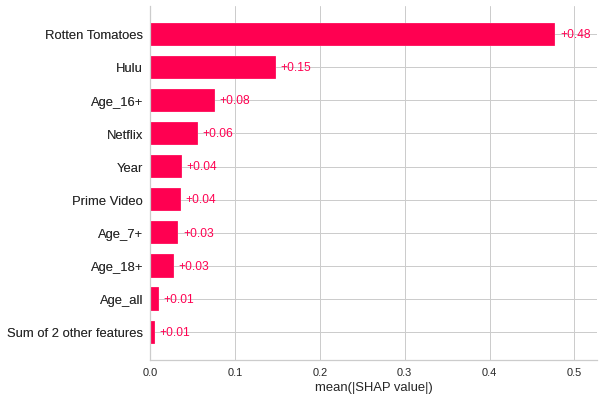

In [37]:
shap.plots.bar(shap_values_linear)

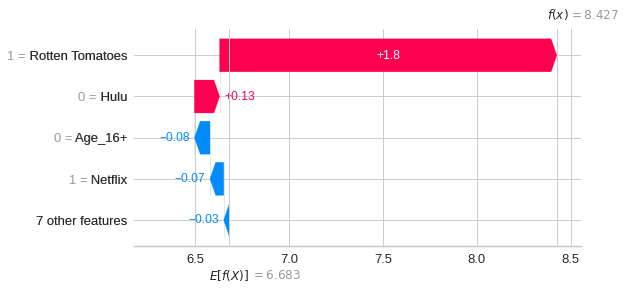

In [41]:
shap.plots.waterfall(shap_values_linear[0], max_display=5)

IMDb score increases by +1.8 as Rotten Tomatoes play a major role



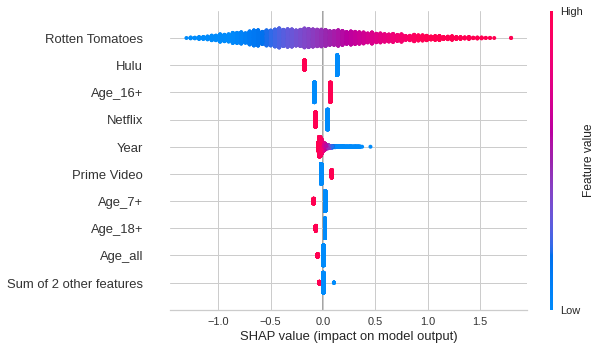

In [39]:
shap.plots.beeswarm(shap_values_linear)

As rotten tomatoes rating increases IMDB increases.


##Interpreting Decision Tree Model using SHAP


In [40]:
# compute the SHAP values for the linear model
explainer_dt = shap.Explainer(dt.predict, X100)
shap_values_dt = explainer_dt(X)

Permutation explainer: 4407it [05:12, 13.61it/s]                          


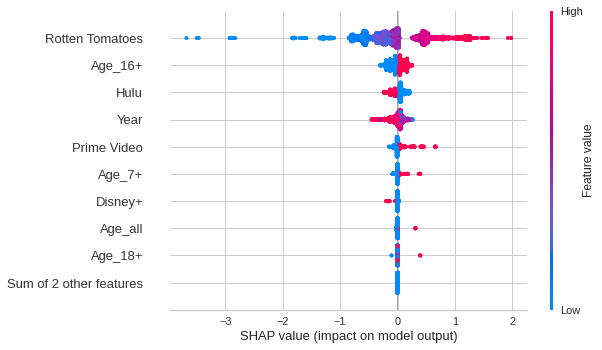

In [ ]:
shap.plots.beeswarm(shap_values_dt)

We've noticed that several movies have extremely low Rotten Tomatoes, which has a negative impact on their IMDb worth.

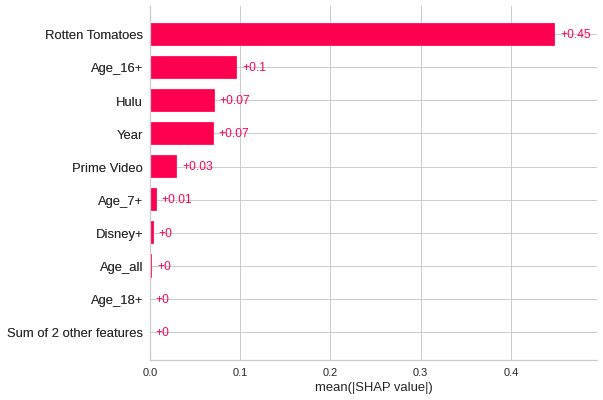

In [ ]:
shap.plots.bar(shap_values_dt)

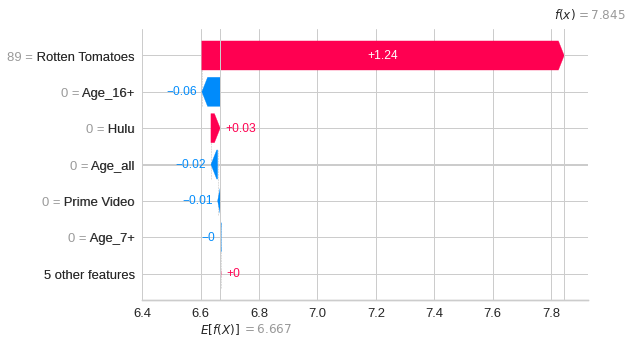

In [ ]:
shap.plots.waterfall(shap_values_dt[sample_ind], max_display=7)

Rotten Tomatoes plays a significant role in increasing the IMDb score by +1.8.

## Interpreting Best Model using SHAP

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=PowerTransformedTargetRegressor(bagging_fraction=0.7, bagging_freq=3,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=71,
                                min_child_weight=0.001, min_split_gain=0.6,
                                n_estimators=100, n_jobs=-1, num_leaves=200,
                                objective=None,
                                power_transformer_method='...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_sampl

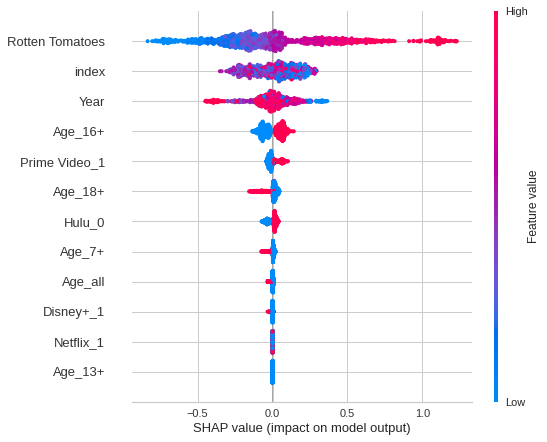

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_model)

##CONCLUSION:

On the data set tv shows, we used a linear model and evaluated the regression coefficients. To choose and refine the best model, we utilized a decision tree regressor and AutoML.
We used SHAP which was utilized to determine the influence of specific attributes.





##LICENSE:

Copyright (c) 2022 yadavadit

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.